In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn import datasets
from sklearn.datasets import load_diabetes

In [235]:
data = pd.read_csv('C:/Users/82106/Desktop/인공지능/diabetes.csv')

In [236]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [237]:
'''
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in data.columns:
    data[i]=le.fit_transform(data[i])
    '''

'\nfrom sklearn.preprocessing import LabelEncoder\nle=LabelEncoder()\nfor i in data.columns:\n    data[i]=le.fit_transform(data[i])\n    '

In [238]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [239]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [240]:
data= data.dropna()

In [241]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [242]:
X=data.drop('Outcome',axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [243]:
y = data['Outcome']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [244]:
data.shape

(768, 9)

In [245]:
from sklearn.model_selection import train_test_split
X = data.iloc[:,0:8].values


from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values

In [246]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [247]:
X.shape

(768, 8)

In [248]:
Y

array([[0, 1],
       [1, 0],
       [0, 1],
       ...,
       [1, 0],
       [0, 1],
       [1, 0]], dtype=uint8)

In [249]:
Y.shape

(768, 2)

In [250]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [316]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam
from keras.layers import Input, Dense
from keras import models
from keras import layers

#model = Model(inputs=inputs, outputs=output)
def build_model(): 
    model = models.Sequential()
    model.add(layers.Dense(26, activation='relu', input_shape=(8,)))
    model.add(layers.Dense(20, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(2, activation='softmax'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0087), metrics=['accuracy'])
    
    return model


model = build_model() 

model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_252 (Dense)           (None, 26)                234       
                                                                 
 dense_253 (Dense)           (None, 20)                540       
                                                                 
 dense_254 (Dense)           (None, 16)                336       
                                                                 
 dense_255 (Dense)           (None, 16)                272       
                                                                 
 dense_256 (Dense)           (None, 16)                272       
                                                                 
 dense_257 (Dense)           (None, 2)                 34        
                                                                 
Total params: 1,688
Trainable params: 1,688
Non-train

C:\Users\82106\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [317]:
#fitting the model and predicting 

# fit network
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
20/20 [==============================] - 1s 8ms/step - loss: 1.2182 - accuracy: 0.5163 - val_loss: 0.8293 - val_accuracy: 0.3052
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6966 - accuracy: 0.5863 - val_loss: 0.6330 - val_accuracy: 0.6948
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6528 - accuracy: 0.6401 - val_loss: 0.6126 - val_accuracy: 0.7013
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6421 - accuracy: 0.6433 - val_loss: 0.6233 - val_accuracy: 0.7338
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6327 - accuracy: 0.6694 - val_loss: 0.5687 - val_accuracy: 0.7403
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6234 - accuracy: 0.6303 - val_loss: 0.5844 - val_accuracy: 0.7078
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6146 - accuracy: 0.6466 - val_loss: 0.5602 - val_accuracy: 0.7338
Epoch 8/100
2

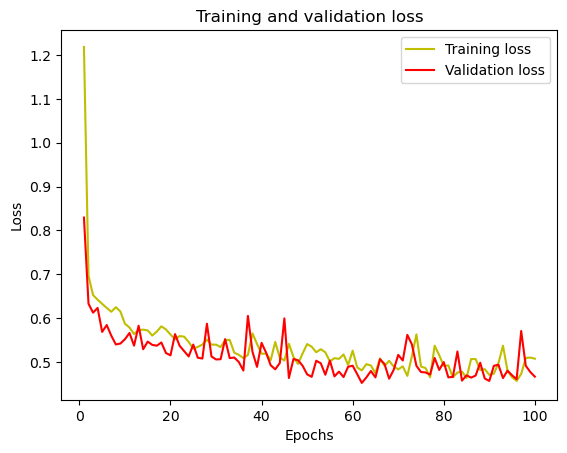

In [318]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

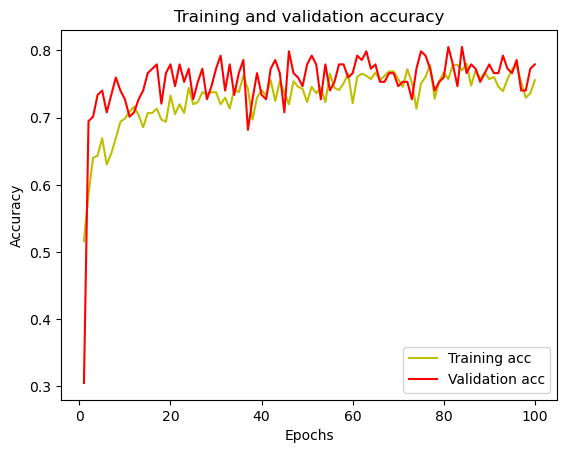

In [319]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [320]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85       107
           1       0.71      0.47      0.56        47

    accuracy                           0.78       154
   macro avg       0.75      0.69      0.71       154
weighted avg       0.77      0.78      0.76       154

[[98  9]
 [25 22]]
